In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd

import matplotlib.image as mpimg

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# 1 Scatter plots

In [2]:
# Read data
expData = pd.read_csv('expDat.txt')
expData.describe()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000
mean,50.500000,4.810000,4.840000,5.360000,5.420000,4.880000,5.160000,4.99000,5.040000,4.65000,...,5.030000,5.140000,5.020000,4.870000,5.120000,4.680000,4.9700,4.880000,5.170000,5.080000
std,29.011492,3.991645,3.719237,4.265246,4.264441,4.013311,3.759755,3.87297,3.795053,3.82542,...,4.312198,4.189983,3.926033,3.791684,4.025876,3.703343,3.9631,4.053381,4.476775,3.945794
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,25.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.00000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000,2.000000,3.000000
50%,50.500000,4.000000,4.000000,4.000000,4.000000,3.500000,4.000000,3.50000,4.000000,4.00000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0000,3.500000,3.000000,4.000000
75%,75.250000,7.000000,7.000000,7.000000,7.250000,8.000000,8.000000,8.00000,8.000000,7.00000,...,7.000000,7.000000,7.000000,7.000000,7.000000,6.250000,7.0000,7.000000,8.000000,6.000000
max,100.000000,17.000000,17.000000,19.000000,18.000000,17.000000,16.000000,18.00000,15.000000,18.00000,...,20.000000,19.000000,16.000000,15.000000,18.000000,16.000000,16.0000,17.000000,23.000000,20.000000


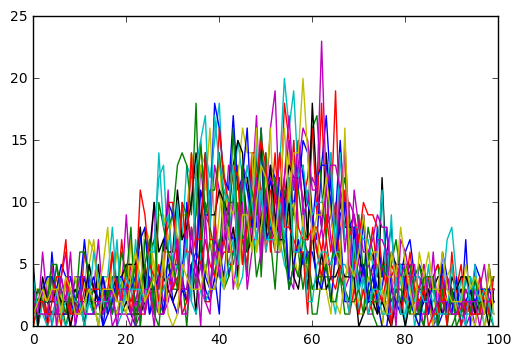

In [3]:
# b)
for c in list(expData.columns[1:]):
    plt.plot( expData[c] )

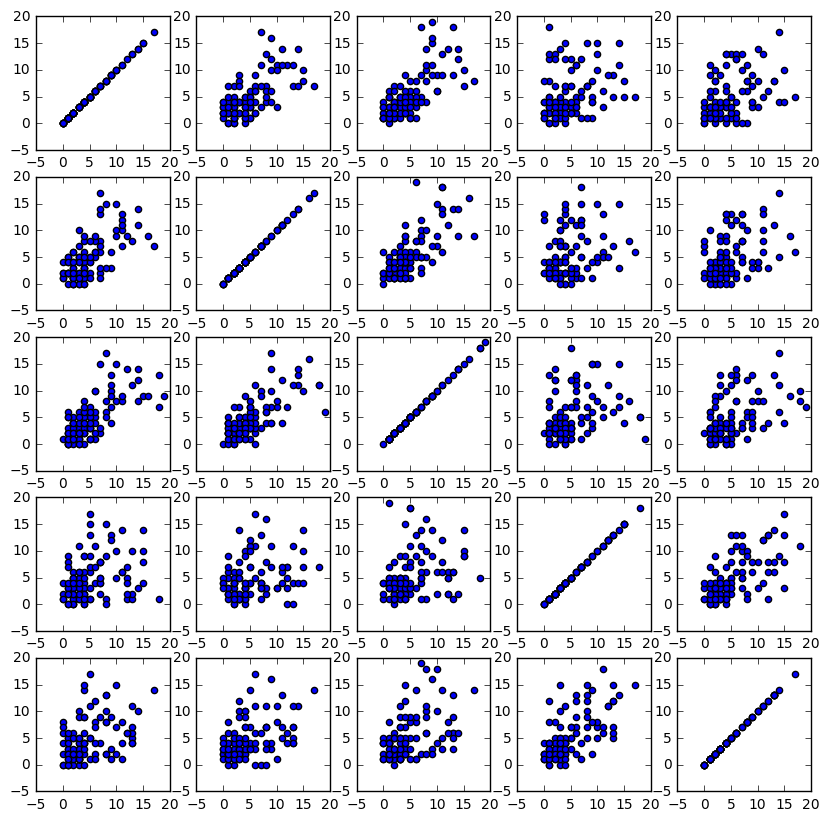

In [4]:
# c)
def plotScatters( df, cols ):
    totalCols = len(cols)
    plt.figure(figsize=(10,10))
    
    for i in range(totalCols):
        for j in range(totalCols):
            plt.subplot(5,5, i*5 + j + 1 )
            plt.scatter( df[cols[i]], df[cols[j]] )


plotScatters( expData, ['V1','V2','V3','V4','V5'] )

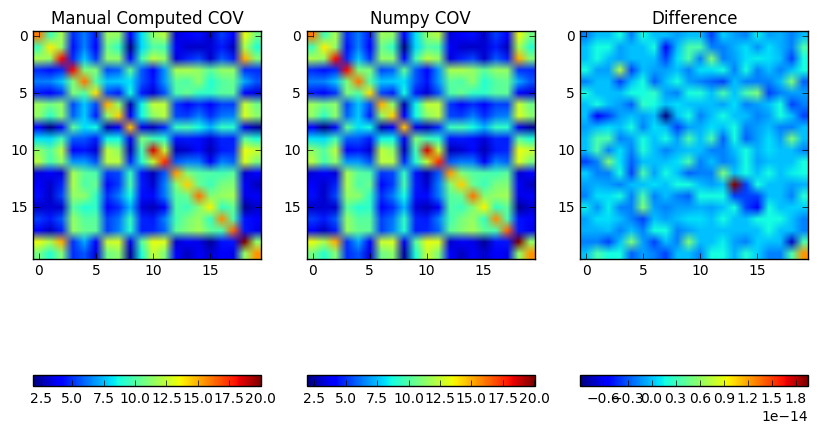

In [39]:
# d)
def computeCov(df):
    # remove first col
    df = np.matrix(df.as_matrix())[:,1:].T
    means = np.mean(df, axis=1)
    
    plt.figure(figsize=(10,10))
    centeredDf = df - means

    plt.subplot(1,3,1)
    cov = np.dot(centeredDf, centeredDf.T) / (df.shape[1] - 1 )
    plt.imshow(cov)
    plt.title("Manual Computed COV")
    plt.colorbar(orientation='horizontal')
    
    plt.subplot(1,3,2)
    inbuiltCov = np.cov(centeredDf)
    plt.imshow(inbuiltCov)
    plt.title("Numpy COV")
    plt.colorbar(orientation='horizontal')
    
    
    plt.subplot(1,3,3)
    plt.imshow(cov - inbuiltCov)
    plt.title("Difference")
    plt.colorbar(orientation='horizontal')
    # output should be 20x20
    
computeCov(expData)

# 2 Plotting 3d

In [6]:
pcaData = pd.read_csv('pca-data-3d.txt')
pcaData.describe()

,x,y,z
count,500.000000,500.000000,500.000000
mean,0.043555,0.091908,-0.059460
std,0.965748,1.345888,2.094110
min,-2.728321,-3.487070,-3.061867
25%,-0.658242,-0.840618,-2.045611
50%,0.055413,0.140944,-0.150139
75%,0.711236,0.985253,2.028950
max,2.303785,3.836981,3.028818


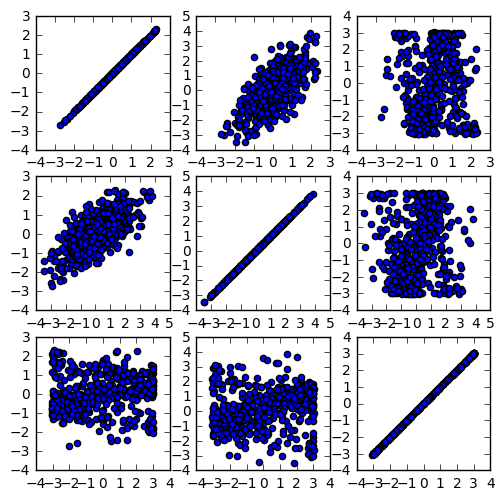

In [7]:
plotScatters(pcaData, list(pcaData.columns))

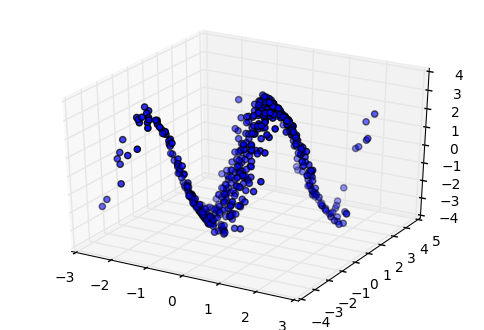

In [8]:
def plot3D(df):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter( df.x, df.y, df.z )

plot3D(pcaData)

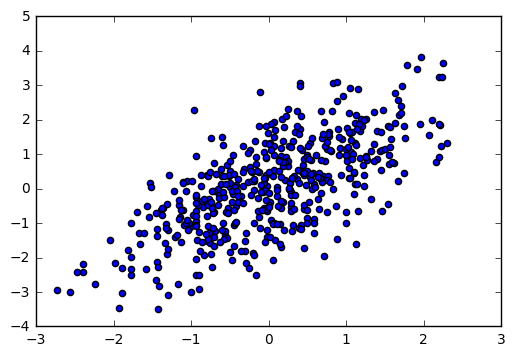

In [9]:
# plotScatters( pcaData, ['x','y'] )
plt.scatter( pcaData.x, pcaData.y )

In [10]:
# compute direction
def getDirectionVector(degree):
    theta = np.radians(degree)
    c, s = np.cos(theta), np.sin(theta)
    R = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
    return np.dot(R, np.array([1,0])).A.flatten()

getDirectionVector(30)

array([ 0.8660254,  0.5      ])

In [11]:
def projectOnToDirection( df, degree ):
    df = np.matrix(df.as_matrix())[:,0:2].T

    v = getDirectionVector(degree).reshape(2,1)

    projected = np.dot(df.T, v)

    return projected
projectOnToDirection( pcaData, 30 ).shape

(500, 1)

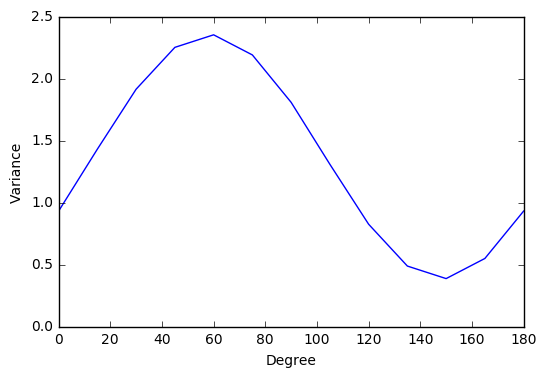

In [12]:
def plotAngleVariance( df, degrees ) :
    variances = []
    plotIdx = 1
    for d in degrees:
        projected = projectOnToDirection(df, d)

        v = np.var(projected)
        
        variances.append(v)
        plotIdx = plotIdx + 1

    plt.plot(degrees, variances )
    plt.xlabel('Degree')
    plt.ylabel('Variance')
plotAngleVariance( pcaData, np.arange(0,181,15))

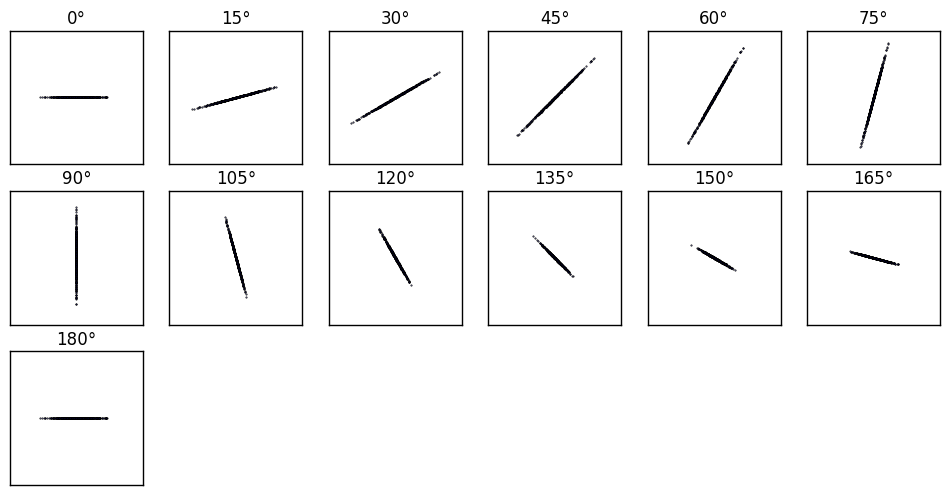

In [13]:
def plotAlongLines( df, degrees ) :
    plt.figure(figsize=(12,10))

    plotIdx = 1
    for d in degrees:
        projected = projectOnToDirection(df, d).reshape(1,500)
        basis = getDirectionVector(d).reshape(2,1)

        alongLines = np.multiply(projected, basis)
        plt.subplot(5,6, plotIdx )
        plt.ylim(-5,5)
        plt.xlim(-5,5)

        plt.title(str(d)+"°")
        plt.scatter( alongLines[0], alongLines[1], s=0.2 )
        plt.xticks([])
        plt.yticks([])

        plotIdx = plotIdx + 1
plotAlongLines( pcaData, np.arange(0,181,15))

# 3 Processing Image Data

0


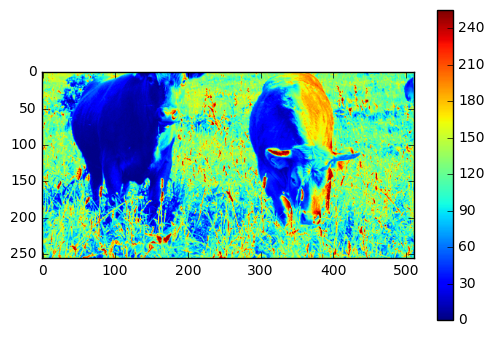

In [30]:
natIMG = mpimg.imread('natIMG.jpg')

# original image
plt.imshow(natIMG)
plt.colorbar()

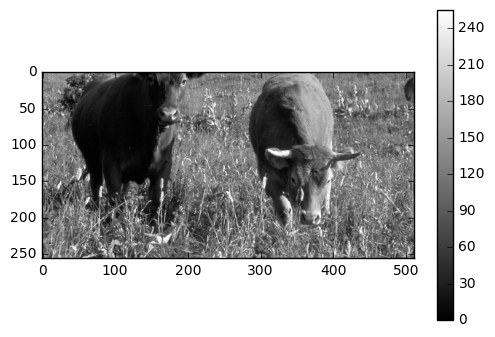

In [15]:
plt.imshow(natIMG, cmap='gray')
plt.colorbar()

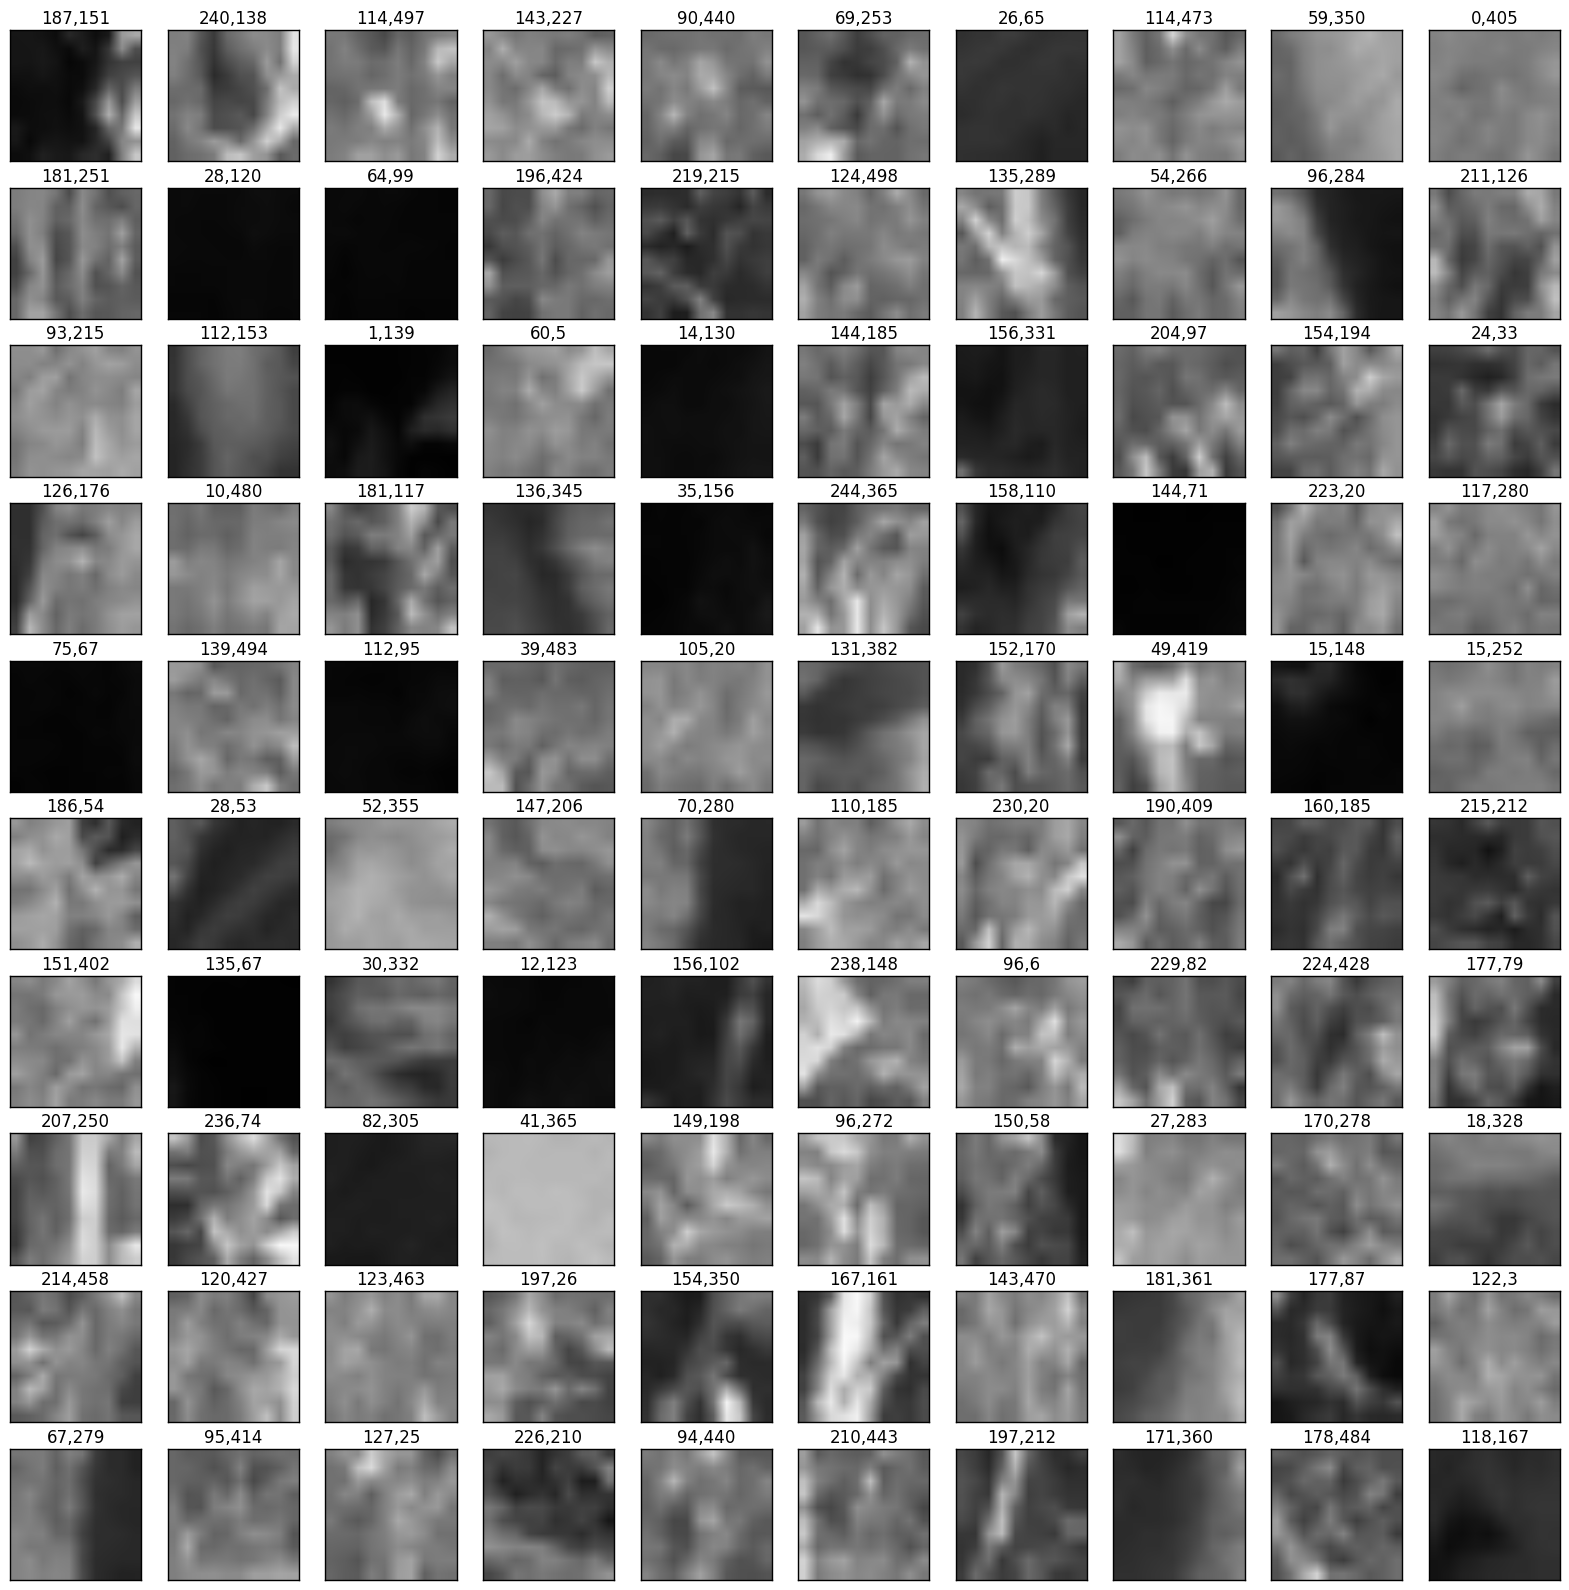

In [31]:
def plotPatches(img, no_patches, cmap='gray'):
    size = 10
    shape = img.shape
    
    plt.figure(figsize=(20,20))

    for i in range(no_patches):
        x = np.random.randint(0, shape[0] - size )
        y = np.random.randint(0, shape[1] - size )
        p = img[x:x+size,y:y+size]
        plt.subplot(10,10,i+1)
        plt.imshow(p, cmap=cmap, vmin=0, vmax=255)
        plt.title( "%d,%d" %(x,y))
        plt.xticks([])
        plt.yticks([])
        
plotPatches(natIMG, 100)

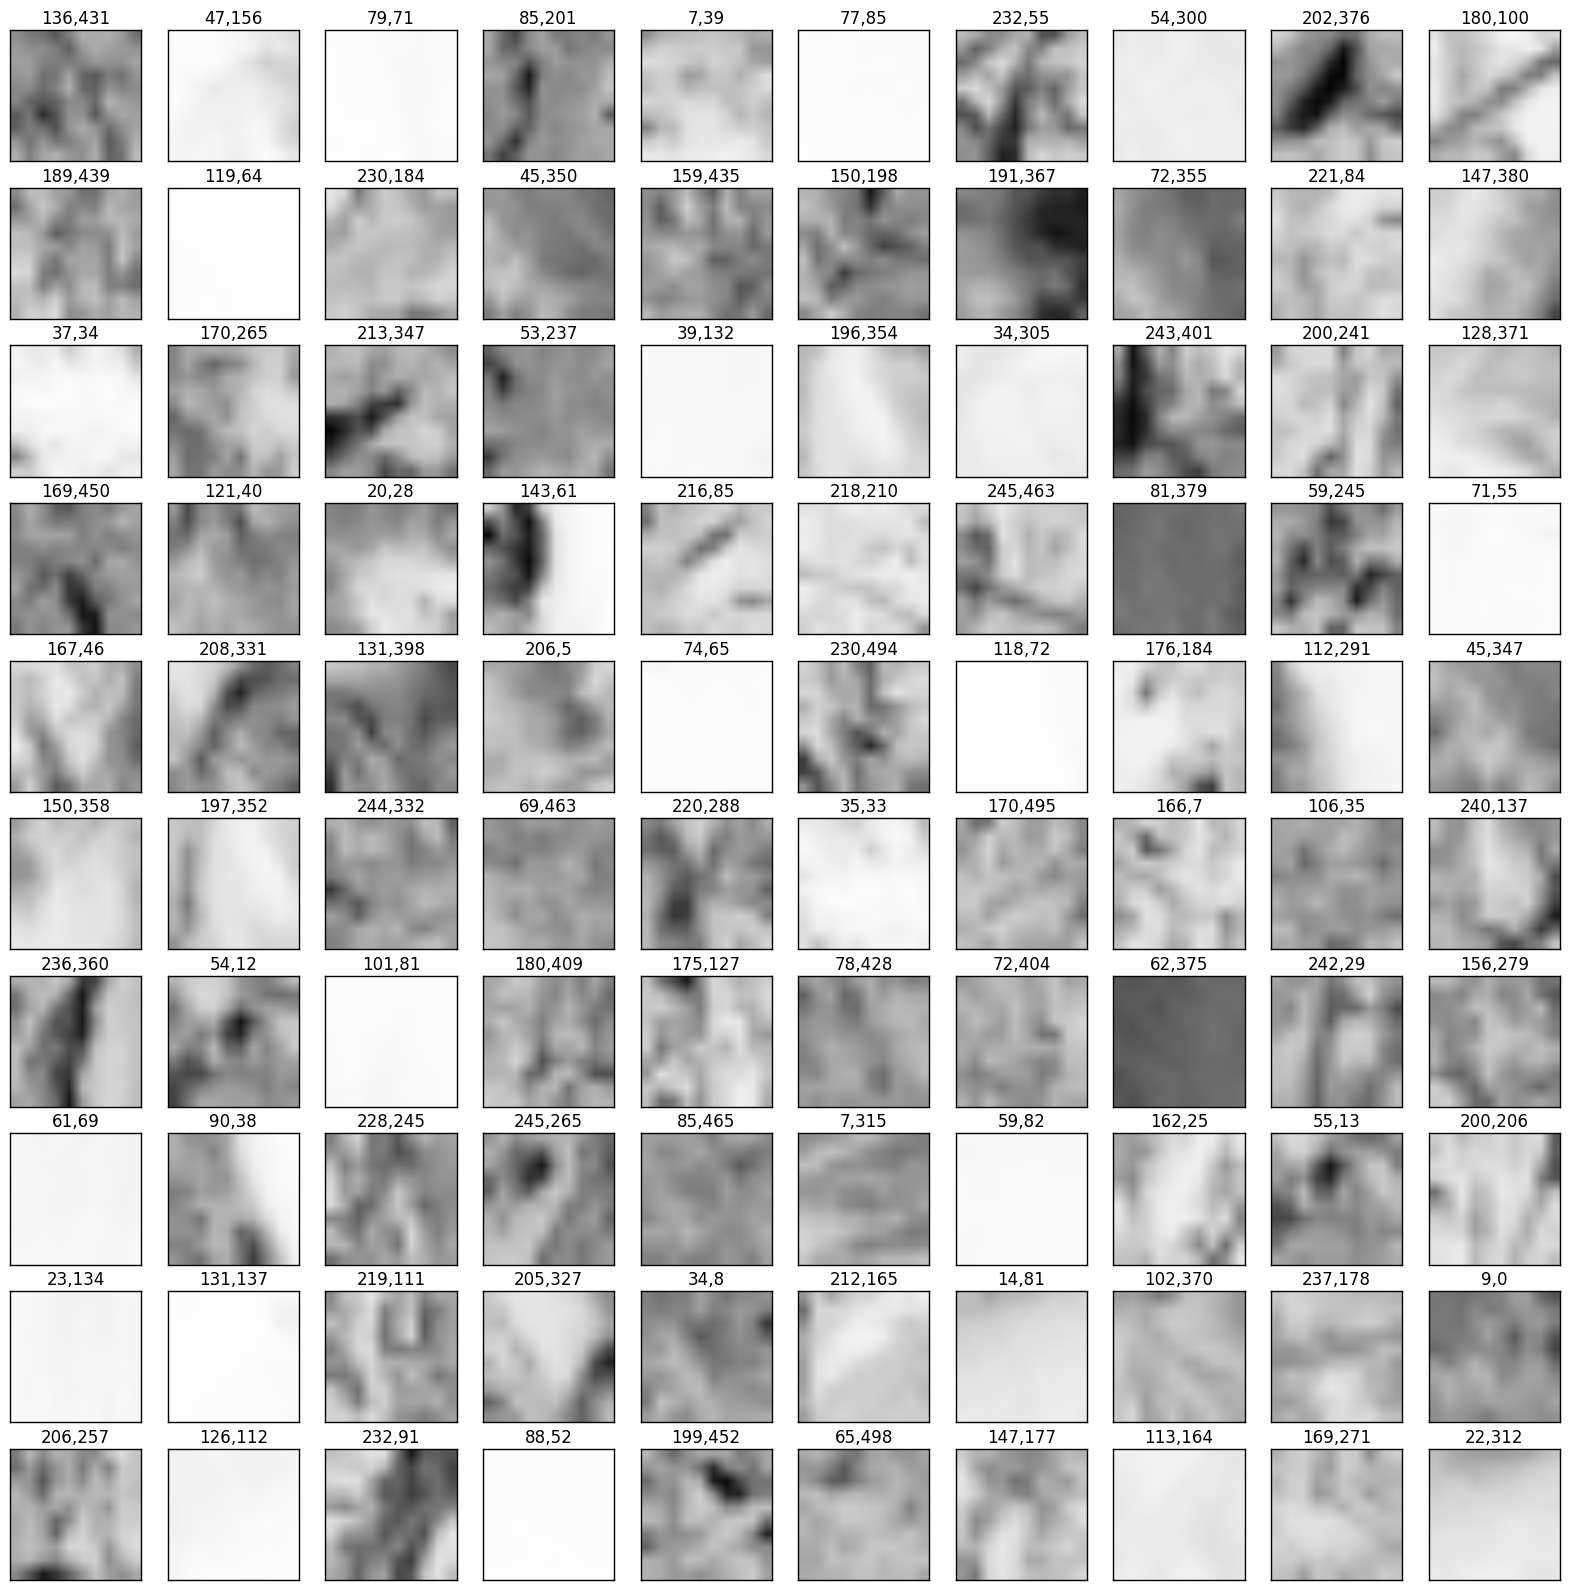

In [32]:
plotPatches(natIMG, 100, cmap="Greys")